# Лабораторная работа 2. Предварительный статистический анализ данных Фишера

## Подготовка данных:

### Подключаем необходимые библиотеки и загружаем dataset:

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from sklearn import datasets
%pylab inline

iris = datasets.load_iris()

iris_frame = DataFrame(iris.data)

iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame = iris_frame.drop('target', axis=1)

Populating the interactive namespace from numpy and matplotlib


### Соответсвующая таблица с данными:

In [2]:
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## 1. Проверка выборок, соответствующих переменным Sepal.Length, Sepal.Width, Petal.Length, Petal.Width на независимость и однородность

### Строим таблицу с зависимостями между признаками и раскрашиваем точки в зависимости от сортов Ирисов:

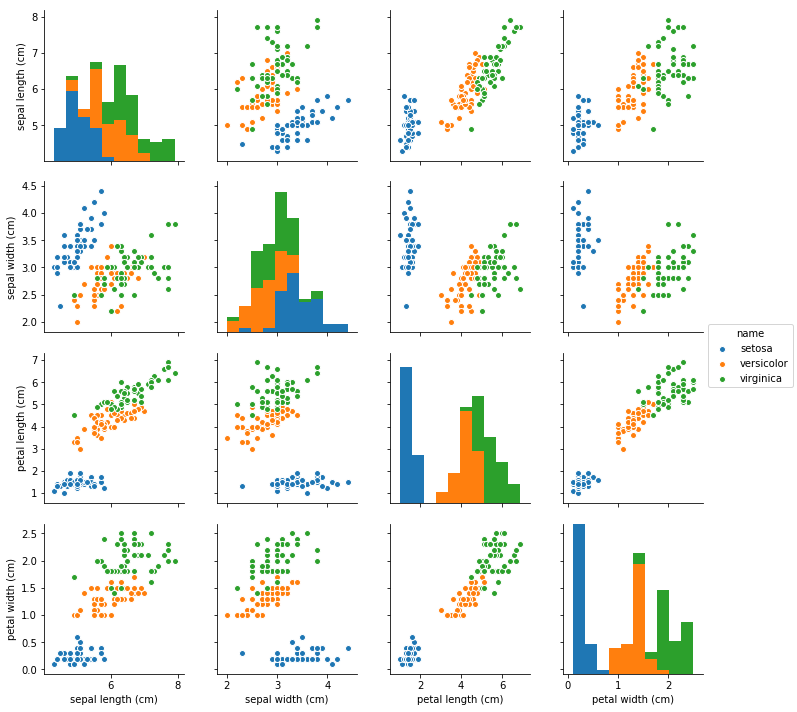

In [25]:
sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

#### Видим, что "petal width" и "petal length" имеют сильную зависимость — точки вытянуты вдоль одной линии. А вот, например, точки "sepal width" и "sepal length", относящиеся к сортам Versicolor и Virginica, перемешаны между собой, что показывает слабую зависимость.
### Далее построим корреляционную матрицу для признаков:

In [26]:
iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


#### Значения коэффициента корреляции интерпретируются следующим образом: до 0,2 — очень слабая корреляция; до 0,5 — слабая; до 0,7 — средняя; до 0,9 — высокая; больше 0,9 — очень высокая
#### Действительно видим, что между переменными "petal length" и "petal width" выявлена очень сильная зависимость 0.96. 

## 2. Исследуем закон распределения случайных выборок, соответствующих переменным Sepal.Length, Sepal.Width, Petal.Length, Petal.Width для Versicolor

### Свод статистик для каждого признака:

In [17]:
summary = iris_frame[iris_frame['name'] == 'versicolor'].describe()
summary = summary.transpose()
skew = []
for feature_name in iris['feature_names']:
    skew.append(st.skew(iris_frame[iris_frame['name'] == 'versicolor'][feature_name]))
summary.insert(8, 'skew', skew)
kurtosis = []
for feature_name in iris['feature_names']:
    kurtosis.append(st.kurtosis(iris_frame[iris_frame['name'] == 'versicolor'][feature_name]))
summary.insert(9, 'kurtosis', kurtosis)
mode = []
for feature_name in iris['feature_names']:
    mode.append(st.mode(iris_frame[iris_frame['name'] == 'versicolor'][feature_name]))
summary.insert(10, 'mode', mode)
summary.head()
    
    

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,mode
sepal length (cm),50.0,5.936,0.516171,4.9,5.600,5.90,6.3,7.0,0.102190,-0.598827,"([5.5], [5])"
sepal width (cm),50.0,2.770,0.313798,2.0,2.525,2.80,3.0,3.4,-0.351867,-0.448272,"([3.0], [8])"
petal length (cm),50.0,4.260,0.469911,3.0,4.000,4.35,4.6,5.1,-0.588159,-0.074402,"([4.5], [7])"
petal width (cm),50.0,1.326,0.197753,1.0,1.200,1.30,1.5,1.8,-0.030236,-0.487833,"([1.3], [13])"


### Строим гистограммы по каждому признаку:

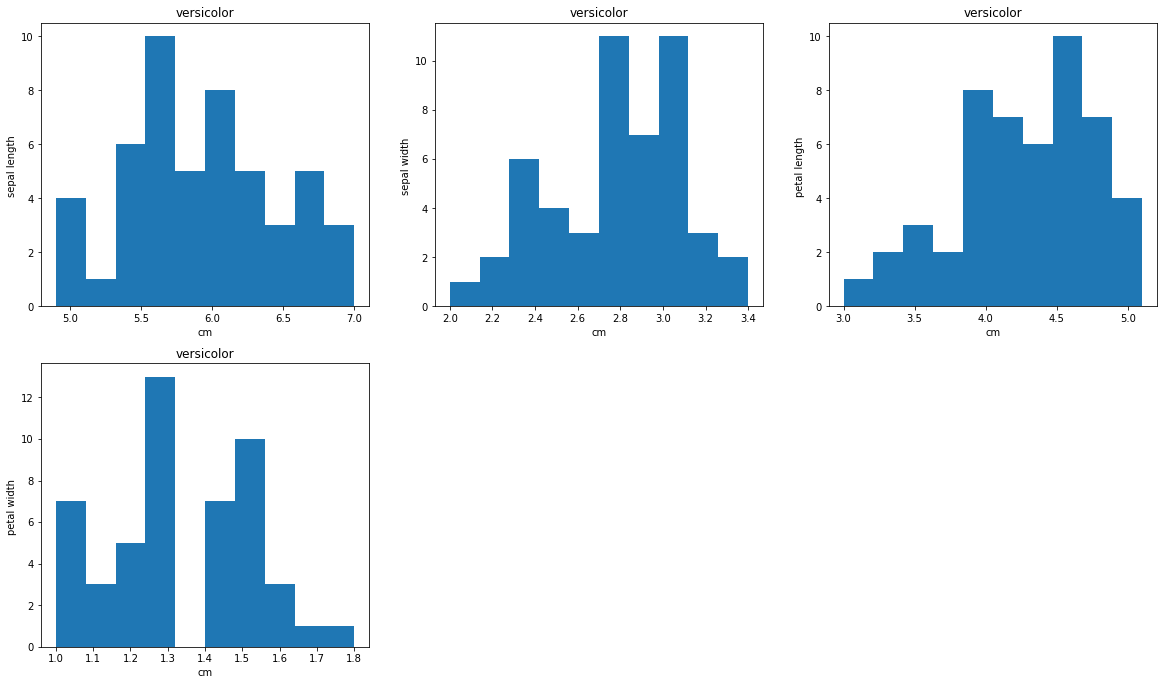

In [12]:
plt.figure(figsize(20, 24))
plot_number = 0

for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number)
    plt.hist(iris_frame[iris_frame.name == 'versicolor'][feature_name], 10)
    plt.title('versicolor')
    plt.xlabel('cm')
    plt.ylabel(feature_name[:-4])


 ### Строим графики "квантиль-квантиль" по каждому признаку:

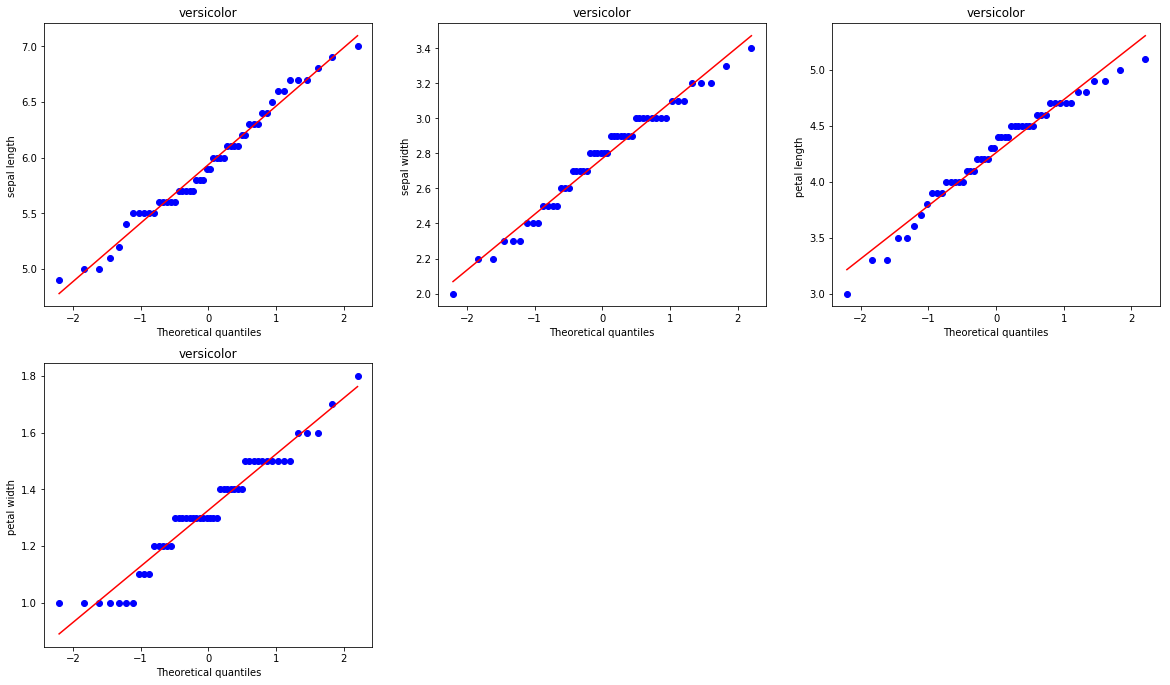

In [27]:
plt.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number) 
    st.probplot(iris_frame[iris_frame.name == 'versicolor'][feature_name], dist="norm", plot=pylab)
    plt.title('versicolor')
    plt.ylabel(feature_name[:-4])
pylab.show()

#### По статистическим данным и по виду графиков можно заметить, что распределение у некоторых выборок похоже на нормальное. Далее будет использован критерий для проверки на нормальность.

## 3. Проверка предположения о нормальном распределении выборок

In [13]:
for feature_name in iris['feature_names']:
    k,p = st.normaltest(iris_frame[iris_frame.name == 'versicolor'][feature_name])
    if p < 0.055:
        print(f' {feature_name} is not normal') 
    else:
        print (f' {feature_name} is normal')
    

 sepal length (cm) is normal
 sepal width (cm) is normal
 petal length (cm) is normal
 petal width (cm) is normal


#### Таким образом, из данного теста, который основывается на тесте Д'Агостино и Пирсона, видим, что выборки имеют нормальное распределение.

## 4. Исследование аномальных наблюдений


### Статистики для Versicolor уже были рассмотрены выше. Свод статистик для каждого признака Virginica:

In [25]:
summary = iris_frame[iris_frame['name'] == 'virginica'].describe()
summary = summary.transpose()
skew = []
for feature_name in iris['feature_names']:
    skew.append(st.skew(iris_frame[iris_frame['name'] == 'virginica'][feature_name]))
summary.insert(8, 'skew', skew)
kurtosis = []
for feature_name in iris['feature_names']:
    kurtosis.append(st.kurtosis(iris_frame[iris_frame['name'] == 'virginica'][feature_name]))
summary.insert(9, 'kurtosis', kurtosis)
mode = []
for feature_name in iris['feature_names']:
    mode.append(st.mode(iris_frame[iris_frame['name'] == 'virginica'][feature_name]))
summary.insert(10, 'mode', mode)
summary.head()
    
    

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis,mode
sepal length (cm),50.0,6.588,0.635880,4.9,6.225,6.50,6.900,7.9,0.114445,-0.087942,"([6.3], [6])"
sepal width (cm),50.0,2.974,0.322497,2.2,2.800,3.00,3.175,3.8,0.354878,0.519766,"([3.0], [12])"
petal length (cm),50.0,5.552,0.551895,4.5,5.100,5.55,5.875,6.9,0.532822,-0.256472,"([5.1], [7])"
petal width (cm),50.0,2.026,0.274650,1.4,1.800,2.00,2.300,2.5,-0.125560,-0.661348,"([1.8], [11])"


### Строим графики "ящик с усами" по каждому признаку для Versicolor:

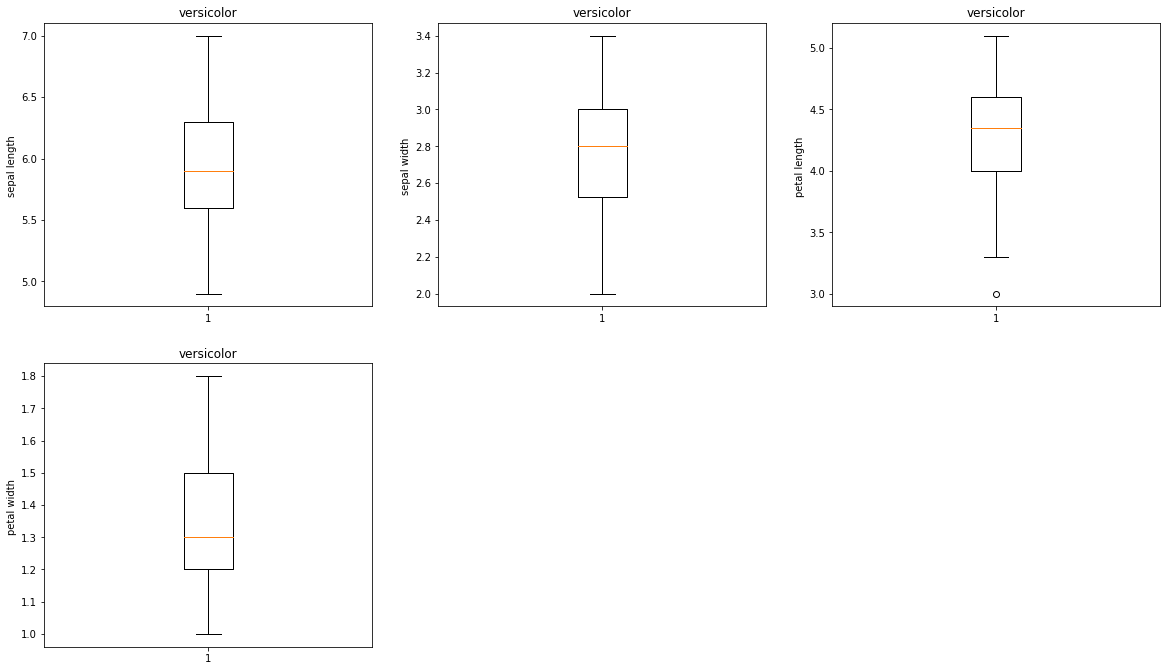

In [21]:
plt.figure(figsize(20, 24))
plot_number = 0

for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number)
    plt.boxplot(iris_frame[iris_frame.name == 'versicolor'][feature_name])
    plt.title('versicolor')
    plt.ylabel(feature_name[:-4])


#### Для Versicolor мы видим на графике одно аномальное значение: "выброс" на признаке "petal length".

### Строим графики "ящик с усами", гистограмму и "квантиль-квантиль" по каждому признаку для Versicolor:

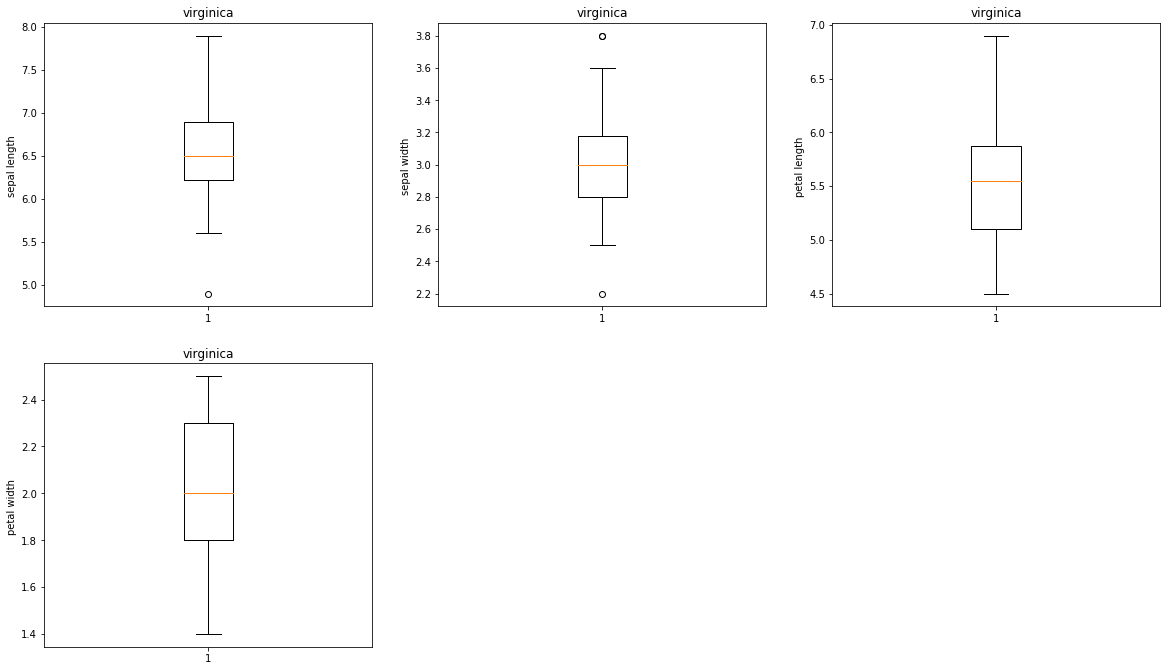

In [28]:
plt.figure(figsize(20, 24))
plot_number = 0

for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number)
    plt.boxplot(iris_frame[iris_frame.name == 'virginica'][feature_name])
    plt.title('virginica')
    plt.ylabel(feature_name[:-4])

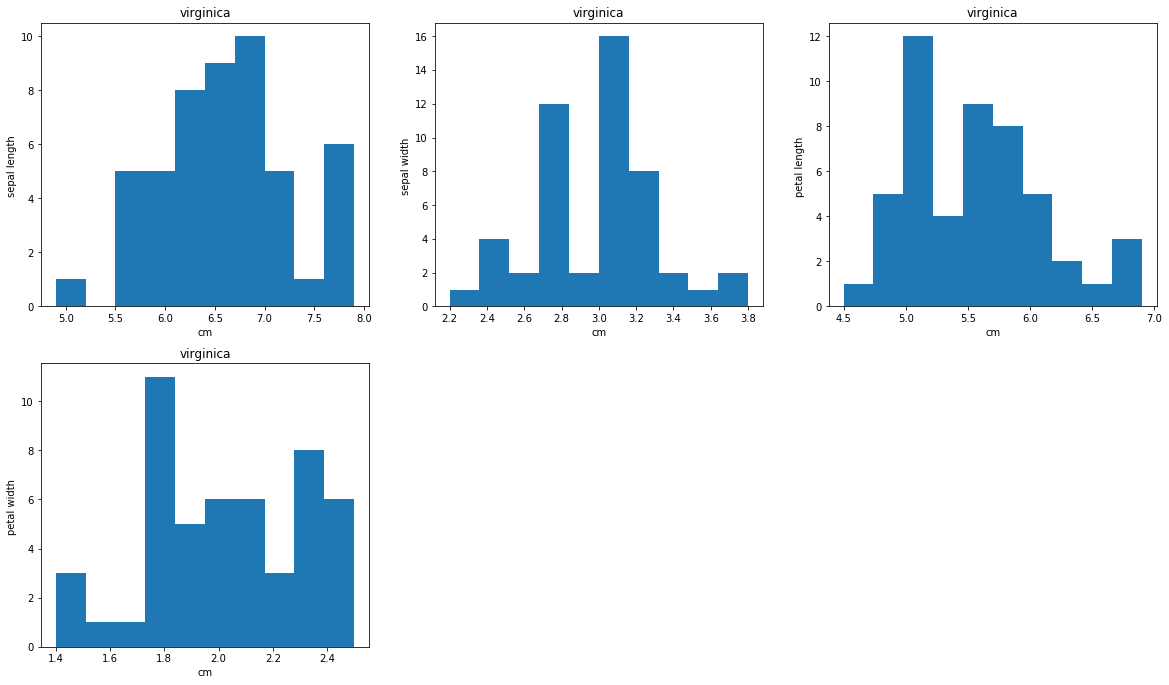

In [17]:
plt.figure(figsize(20, 24))
plot_number = 0

for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number)
    plt.hist(iris_frame[iris_frame.name == 'virginica'][feature_name], 10)
    plt.title('virginica')
    plt.xlabel('cm')
    plt.ylabel(feature_name[:-4])


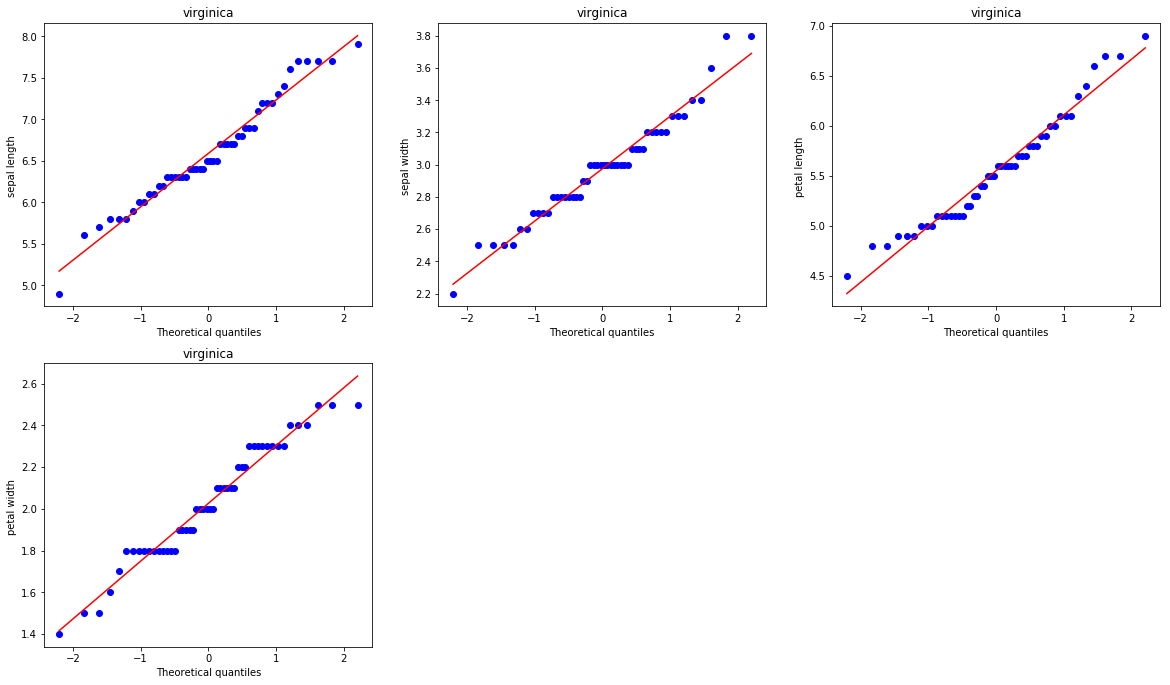

In [27]:
plt.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    plot_number += 1
    plt.subplot(4, 3, plot_number) 
    st.probplot(iris_frame[iris_frame.name == 'virginica'][feature_name], dist="norm", plot=pylab)
    plt.title('virginica')
    plt.ylabel(feature_name[:-4])
pylab.show()

#### Для Virginica уже наблюдаем больше аномальных значений: "выбросы" на признаках "sepal length" и "sepal width".